# Embedding and Imputation on Ramani et al. scHi-C

## Notes

This tutorial uses the new API of Higashi (wrapping all functions of Higashi into the Higashi() class).
The old API of Higashi will still be supported and maintained).
Please check changelog for the current status of migration from the old API to the new API.

## Preparation

### Download input files
Download the demo data from the following link (Ramani et al.)
https://drive.google.com/drive/folders/1S0KOMAj60MxQP6mgPV1OKjn_J-lVpzKM?usp=sharing

The dataset contains 620 cells from the ML1/ML3 library of the Ramani et al. dataset.

Change the file path in the corresponding JSON file according to the location of the downloaded files.

### Install Higashi

1. install pytorch>=1.8.0 with cuda support when available.
2. `conda install -c ruochiz higashi`
(Although higashi would install pytorch when needed, there is no guarantee that it will install the correct version with cuda support. It is recommended to install pytorch separately before higashi.)

## Start running Higashi¶

### 1. Import package, set the path to the configuration JSON file.¶

In [1]:
cd ..

/home/mscs/congfeng4/GuidedStudy/Code/Higashi


In [2]:
from higashi.Higashi_wrapper import *
config = "./Data/config_ramani.JSON"
higashi_model = Higashi(config)

### 2. Process data for higashi model

In [ ]:
# higashi_model.process_data()

: 

### 3. Prep the higashi model for training and imputation & Stage 1 training

In [14]:
def save_model_from_checkpoint():
    import os

    sd = torch.load(os.path.expanduser("./Temp/model/model.chkpt_stage1"))
    higashi_model.higashi_model.load_state_dict(sd['model_link'], strict=False)
    torch.save(higashi_model.higashi_model, os.path.expanduser("./Temp/model/model.chkpt_stage1_model"))


In [ ]:
higashi_model.prep_model()
# Stage 1 training
# higashi_model.train_for_embeddings(max_epochs=1)

cpu_num 6
setting to gpu:0
training on data from: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
total_sparsity_cell 0.025731658257764963
no contractive loss
batch_size 256
Node type num [620 250 244 199 192 181 172 160 147 142 136 136 134 116 108 103  91  82
  79  60  64  49  52 156] [ 620  870 1114 1313 1505 1686 1858 2018 2165 2307 2443 2579 2713 2829
 2937 3040 3131 3213 3292 3352 3416 3465 3517 3673]
start making attribute



loss 0.5398055911064148 loss best 0.5231655240058899 epochs 130

initializing data generator



initializing data generator


In [15]:
# save_model_from_checkpoint()

In [ ]:
higashi_model.train_for_phasing(max_epochs=5)


[ Epoch 0 of 5 ]


- (Train)   bce:  1.2031, mse:  0.0000,  acc: 50.269 %, pearson: 0.323, spearman: 0.310, elapse: 210.890 s


- (Valid) bce:  1.2055,  acc: 49.297 %,pearson: 0.333, spearman: 0.337,elapse: 0.985 s

[ Epoch 1 of 5 ]


- (Train)   bce:  1.1884, mse:  0.0000,  acc: 48.587 %, pearson: 0.336, spearman: 0.323, elapse: 145.719 s


- (Valid) bce:  1.1927,  acc: 47.083 %,pearson: 0.335, spearman: 0.329,elapse: 0.066 s

[ Epoch 2 of 5 ]


- (Train)   bce:  1.1825, mse:  0.0000,  acc: 47.710 %, pearson: 0.339, spearman: 0.324, elapse: 100.081 s


- (Valid) bce:  1.1750,  acc: 47.845 %,pearson: 0.359, spearman: 0.336,elapse: 0.067 s

[ Epoch 3 of 5 ]


- (Train)   bce:  1.1797, mse:  0.0000,  acc: 46.571 %, pearson: 0.336, spearman: 0.319, elapse: 102.339 s


- (Valid) bce:  1.1893,  acc: 48.327 %,pearson: 0.348, spearman: 0.326,elapse: 0.067 s

[ Epoch 4 of 5 ]


- (Train)   bce:  1.1764, mse:  0.0000,  acc: 46.602 %, pearson: 0.339, spearman: 0.323, elapse: 101.086 s


- (Valid) bce:  1.1619,  acc: 47.363 %,pearson: 0.347, spearman: 0.324,elapse: 0.067 s



  - (Validation-hyper) bce:  1.1466,  acc: 48.177 %, auc: 0.362, aupr: 0.339,elapse: 1.148 s
No 0 nbr imputation for chr1 0
No 6 nbr imputation for chr1 0


ValueError: not enough values to unpack (expected 6, got 4)

In [ ]:
higashi_model.phase()


In [ ]:
higashi_model.train_for_imputation_nbr_0()
higashi_model.impute_no_nbr()

### 5. Stage 3 training and imputation with neighbor information

In [ ]:
higashi_model.train_for_imputation_with_nbr()
higashi_model.impute_with_nbr()

### 5. Visulizing embedding results

In [5]:
# Visualize embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from umap import UMAP
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

cell_type = higashi_model.label_info['cell type']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)

vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.show()



Loading from last training results
(620, 64)


LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mStoring i64 to ptr of i32 ('dim'). FE type int32
[1m
File "../../../.local/lib/python3.6/site-packages/umap/layouts.py", line 52:[0m
[1mdef rdist(x, y):
    <source elided>
    result = 0.0
[1m    dim = x.shape[0]
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: lowering "dim = static_getitem(value=$0.3, index=0, index_var=$const0.4, fn=<built-in function getitem>)" at /home/mscs/congfeng4/.local/lib/python3.6/site-packages/umap/layouts.py (52)[0m

### 6. Visualizing imputation results

No 0 nbr imputation for chr3 299
No 6 nbr imputation for chr3 299
No 0 nbr imputation for chr3 341
No 6 nbr imputation for chr3 341
No 0 nbr imputation for chr3 525
No 6 nbr imputation for chr3 525
No 0 nbr imputation for chr3 155
No 6 nbr imputation for chr3 155
No 0 nbr imputation for chr3 132
No 6 nbr imputation for chr3 132


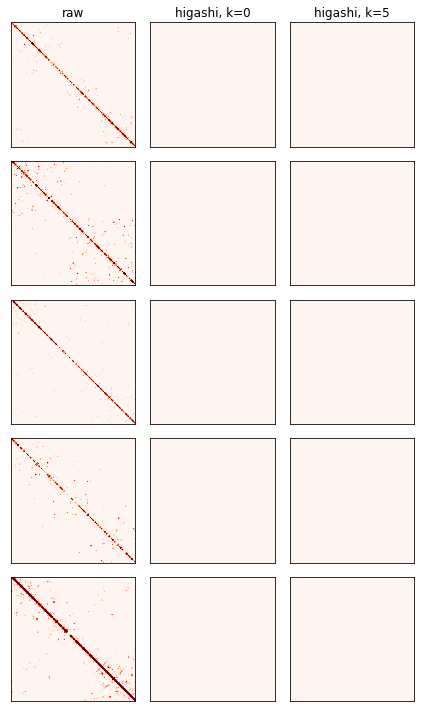

In [9]:
count = 0
fig = plt.figure(figsize=(6, 2*5))
for id_ in np.random.randint(0, 620, 5):
    ori, nbr0, nbr5 = higashi_model.fetch_map("chr3", id_)
    count += 1
    ax = plt.subplot(5, 3, count * 3 - 2)
    ax.imshow(ori.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(ori.data, 0.6))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("raw")

    ax = plt.subplot(5, 3, count * 3 - 1)
    ax.imshow(nbr0, cmap='Reds', vmin=0.0, vmax=np.quantile(nbr0.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=0")

    ax = plt.subplot(5, 3, count * 3)
    ax.imshow(nbr5, cmap='Reds', vmin=0.0, vmax=np.quantile(nbr5.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=5")

plt.tight_layout()